In [ ]:
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from src.config import DATASET_NAMES, BEST_COMPONENT_NUMBER
from src.gaussian_mixture.gaussian_mixture import evaluate_case, find_best_component_number
from src.utils.dataset import *
import matplotlib as mpl
from scipy import linalg

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
datasets = [load(dataset) for dataset in DATASET_NAMES]

In [ ]:
n_samples = 500
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

X = pd.DataFrame(X, columns=['0', '1'])
X.name = 'synthetic'
datasets.append(X)
BEST_COMPONENT_NUMBER['synthetic'] = 2

In [ ]:
visualize_many(datasets)

In [ ]:
for dataset in datasets:
    evaluate_case(dataset)
    plt.show()

In [ ]:
for dataset in datasets:
    n_components = BEST_COMPONENT_NUMBER[dataset.name]
    evaluate_case(dataset, n_components=n_components)
    plt.show()

In [ ]:
### covariance type analysis
### allow classifier to chose cluster count
covariance_types = ['spherical', 'tied', 'diag', 'full']
for dataset in datasets:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    for cov_type, ax in zip(covariance_types, list(axes.flat)):
        evaluate_case(dataset, covariance_type=cov_type, draw_ellipses=True, ax=ax)
    plt.show()

In [ ]:
### use predefined cluster count
for dataset in datasets:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    n_components = BEST_COMPONENT_NUMBER[dataset.name]
    for cov_type, ax in zip(covariance_types, list(axes.flat)):
        evaluate_case(dataset, covariance_type=cov_type, n_components=n_components, draw_ellipses=True, ax=ax)
    plt.show()

In [ ]:
for init_method in ['kmeans', 'random']:
    dataset = datasets[1]
    n_components = BEST_COMPONENT_NUMBER[dataset.name]
    evaluate_case(dataset, n_components=n_components, draw_ellipses=True, init_params=init_method)
    plt.show()

In [ ]:
for init_method in ['kmeans', 'random']:
    dataset = datasets[1]
    n_components = BEST_COMPONENT_NUMBER[dataset.name]
    evaluate_case(dataset, n_components=n_components, draw_ellipses=True, init_params=init_method)
    plt.show()


In [ ]:
for dataset in datasets:
    for weight_concentration_prior_type in ['dirichlet_process', 'dirichlet_distribution']:
        n_components = BEST_COMPONENT_NUMBER[dataset.name]
        evaluate_case(dataset,
                      n_components=n_components,
                      draw_ellipses=True,
                      weight_concentration_prior_type=weight_concentration_prior_type)
        plt.show()


In [ ]:
for dataset in datasets:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    for weight_concentration_prior, ax in zip([0.1, 0.5, 1, 10], list(axes.flat)):
        n_components = BEST_COMPONENT_NUMBER[dataset.name]
        evaluate_case(dataset,
                      n_components=n_components,
                      draw_ellipses=True,
                      ax=ax,
                      weight_concentration_prior=weight_concentration_prior
        )
    plt.show()


In [ ]:
for dataset in datasets:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
    for mean_precision_prior, ax in zip([0.1, 0.5, 1, 10], list(axes.flat)):
        n_components = BEST_COMPONENT_NUMBER[dataset.name]
        evaluate_case(dataset,
                      n_components=n_components,
                      draw_ellipses=True,
                      ax=ax,
                      mean_precision_prior=mean_precision_prior
        )
    plt.show()


In [19]:
df = load('housec5.txt')

c:\users\user\iet\um\agh-um-gaussian-mixture-models\venv\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


<AxesSubplot:title={'center':'housec5'}, xlabel='0', ylabel='1'>

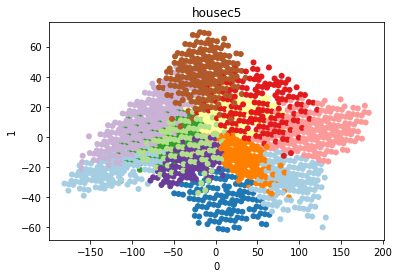

In [22]:
evaluate_case(df)